In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from PIL import Image

# Load and preprocess images
def load_images_from_folder(folder_path, img_size=(64, 64)):
    images = []
    labels = []
    
    # Auto-detect class names from folder
    class_names = sorted([d for d in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, d))])
    label_map = {name: idx for idx, name in enumerate(class_names)}
    print("Class names:", class_names)
    print("Detected classes:", label_map)

    for label_name in class_names:
        class_path = os.path.join(folder_path, label_name)

        for filename in os.listdir(class_path):
            img_path = os.path.join(class_path, filename)

            try:
                img = Image.open(img_path).convert("RGB").resize(img_size)
                img_array = np.array(img).flatten()
                images.append(img_array)
                labels.append(label_map[label_name])
            except Exception as e:
                print(f"Error loading {img_path}: {e}")

    return np.array(images), np.array(labels), class_names

Class names: ['plastic_cup_lids', 'plastic_detergent_bottles', 'plastic_shopping_bags', 'plastic_soda_bottles']
Detected classes: {'plastic_cup_lids': 0, 'plastic_detergent_bottles': 1, 'plastic_shopping_bags': 2, 'plastic_soda_bottles': 3}


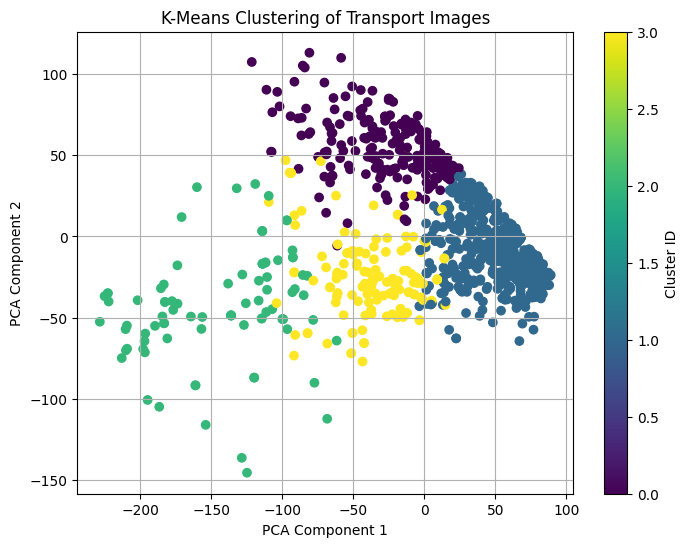

In [3]:
# Dataset path (now using your new structure)
image_dir = "dataset_split/train"

# Load and scale image data
X, y, class_names = load_images_from_folder(image_dir)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# KMeans clustering (same number of clusters as classes)
kmeans = KMeans(n_clusters=len(class_names), random_state=42, n_init=10)
kmeans.fit(X_scaled)

cluster_labels = kmeans.labels_

# Visualize clustering results
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis')
plt.title("K-Means Clustering of Transport Images")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Cluster ID')
plt.grid(True)
plt.show()

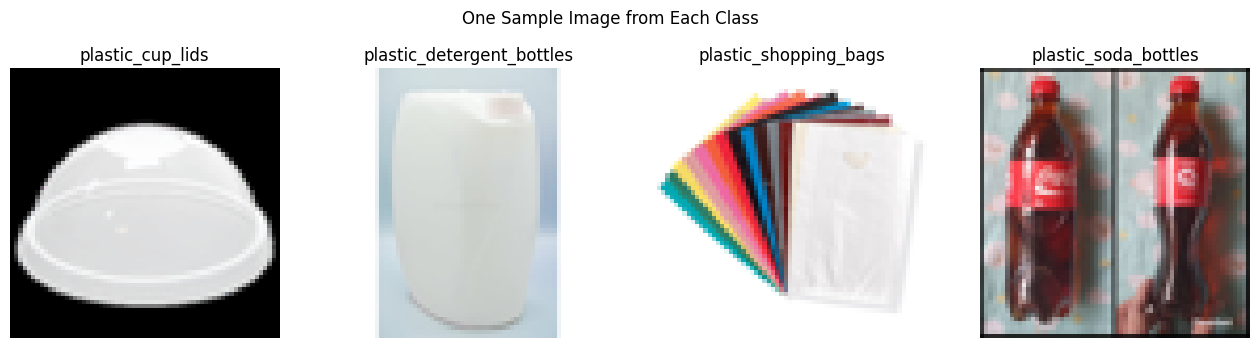

In [4]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import random

def display_sample_images(image_dir):
    class_names = ['plastic_cup_lids', 'plastic_detergent_bottles', 'plastic_shopping_bags', 'plastic_soda_bottles']
    
    # Determine number of rows/cols for plotting
    n_classes = len(class_names)
    n_cols = 4
    n_rows = (n_classes + n_cols - 1) // n_cols  # ceil division
    
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(4*n_cols, 4*n_rows))
    axs = axs.flatten()  # flatten in case of multiple rows

    for i, class_name in enumerate(class_names):
        class_folder = os.path.join(image_dir, class_name)
        images = os.listdir(class_folder)
        sample_image_path = os.path.join(class_folder, random.choice(images))  # random sample
        image = Image.open(sample_image_path).resize((64, 64))
        axs[i].imshow(image)
        axs[i].axis('off')
        axs[i].set_title(class_name)

    # Hide unused axes if any
    for j in range(i+1, len(axs)):
        axs[j].axis('off')

    plt.suptitle("One Sample Image from Each Class")
    plt.show()

display_sample_images(image_dir)
